In [1]:
import numpy as np
from google.colab import drive
import sys
import os
import matplotlib.pyplot as plt

# Load data from CSV files
drive.mount('/content/drive')
prefix = '/content/drive/My Drive/'
customized_path_to_your_project= 'Colab Notebooks/'
sys_path = prefix + customized_path_to_your_project
sys.path.append(sys_path)


weatherHistory = np.loadtxt(os.path.join(sys_path, 'weatherHistory.csv'), delimiter=",", dtype=str)
jenaClimate = np.loadtxt(os.path.join(sys_path, 'jena_climate_2009_2016.csv'), delimiter=",", dtype=str)

Mounted at /content/drive


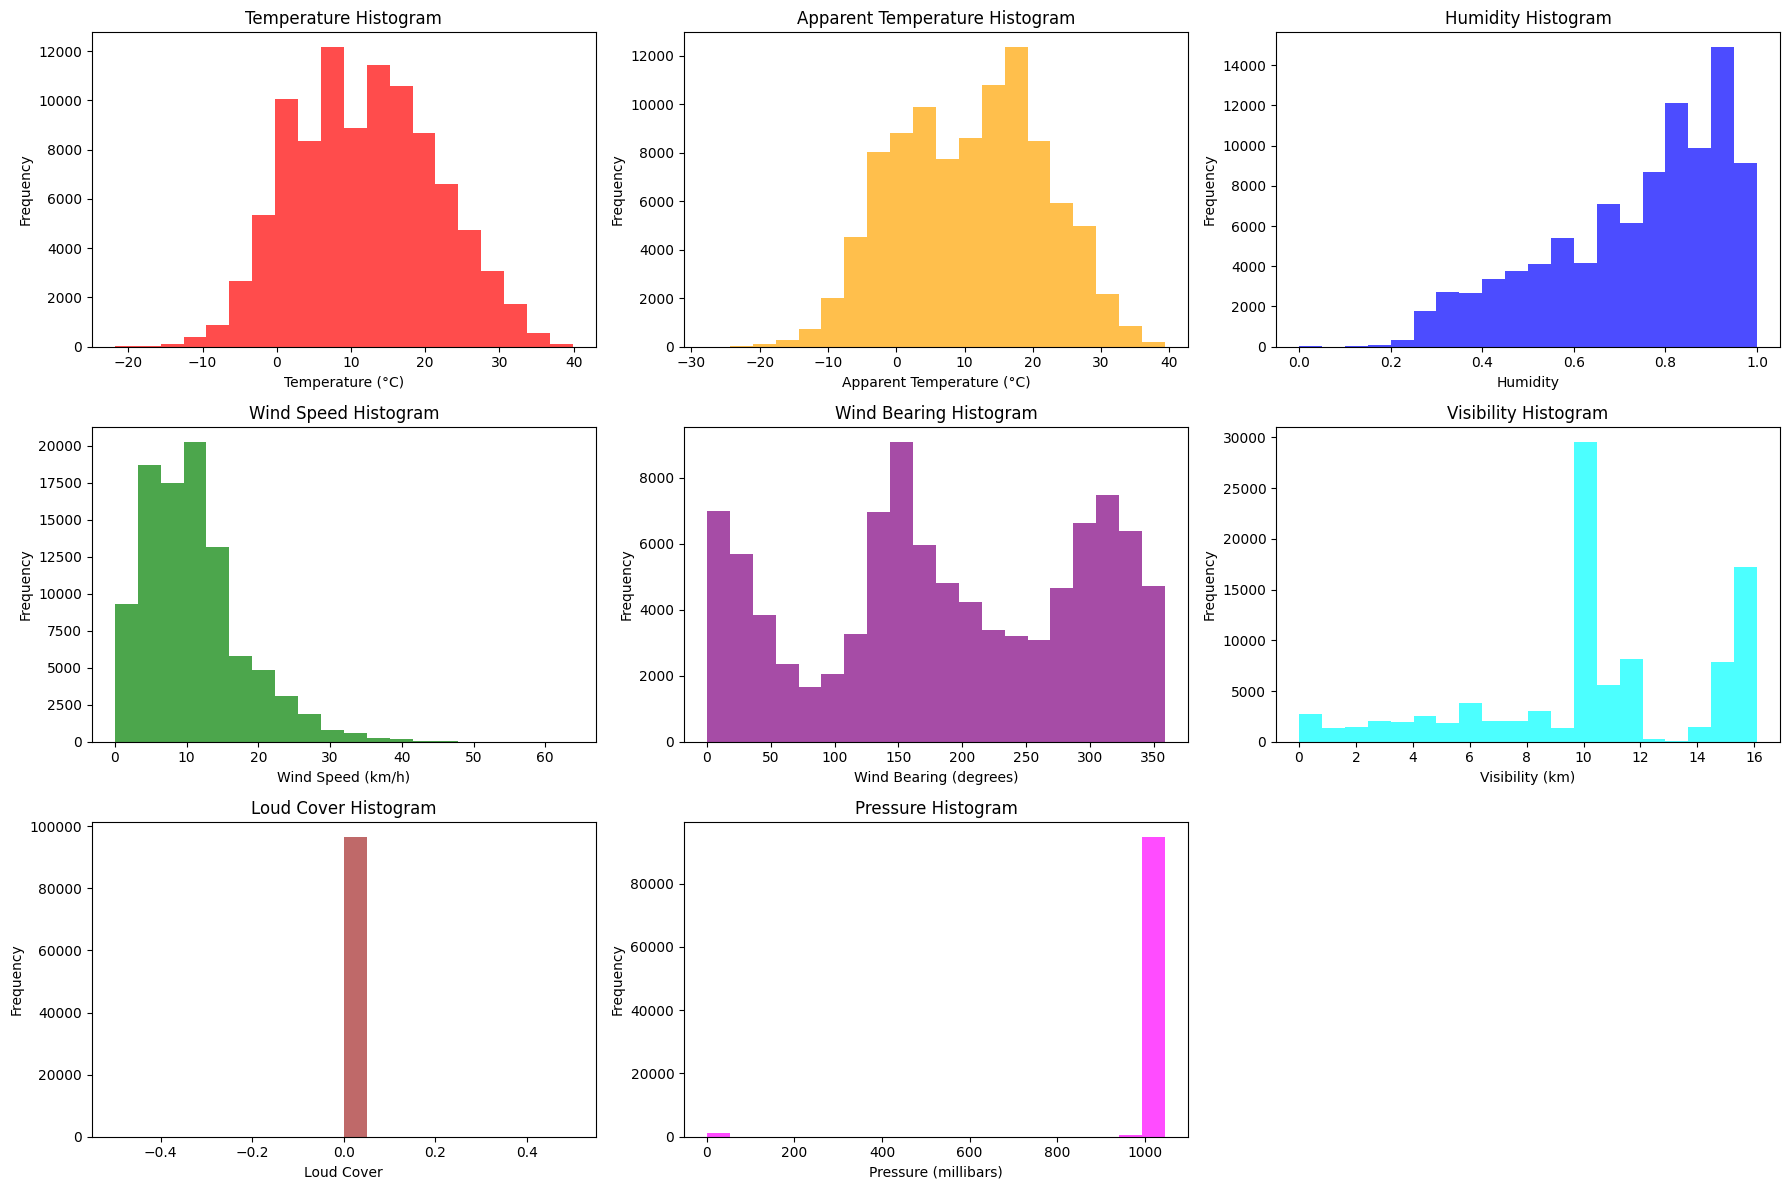

In [2]:
#Visualize data

# Convert numerical columns to float for visualization
numeric_columns = [3, 4, 5, 6, 7, 8, 9, 10]
# Convert only the numerical columns to float for visualization
weather_data_numeric = weatherHistory[1:, numeric_columns].astype(float)

# Plot histograms for various features
plt.figure(figsize=(18, 12))

# Temperature histogram
plt.subplot(3, 3, 1)
plt.hist(weather_data_numeric[:, 0], bins=20, color='red', alpha=0.7)
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Temperature Histogram')

# Apparent Temperature histogram
plt.subplot(3, 3, 2)
plt.hist(weather_data_numeric[:, 1], bins=20, color='orange', alpha=0.7)
plt.xlabel('Apparent Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Apparent Temperature Histogram')

# Humidity histogram
plt.subplot(3, 3, 3)
plt.hist(weather_data_numeric[:, 2], bins=20, color='blue', alpha=0.7)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Humidity Histogram')

# Wind Speed histogram
plt.subplot(3, 3, 4)
plt.hist(weather_data_numeric[:, 3], bins=20, color='green', alpha=0.7)
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.title('Wind Speed Histogram')

# Wind Bearing histogram
plt.subplot(3, 3, 5)
plt.hist(weather_data_numeric[:, 4], bins=20, color='purple', alpha=0.7)
plt.xlabel('Wind Bearing (degrees)')
plt.ylabel('Frequency')
plt.title('Wind Bearing Histogram')

# Visibility histogram
plt.subplot(3, 3, 6)
plt.hist(weather_data_numeric[:, 5], bins=20, color='cyan', alpha=0.7)
plt.xlabel('Visibility (km)')
plt.ylabel('Frequency')
plt.title('Visibility Histogram')

# Loud Cover histogram
plt.subplot(3, 3, 7)
plt.hist(weather_data_numeric[:, 6], bins=20, color='brown', alpha=0.7)
plt.xlabel('Loud Cover')
plt.ylabel('Frequency')
plt.title('Loud Cover Histogram')

# Pressure histogram
plt.subplot(3, 3, 8)
plt.hist(weather_data_numeric[:, 7], bins=20, color='magenta', alpha=0.7)
plt.xlabel('Pressure (millibars)')
plt.ylabel('Frequency')
plt.title('Pressure Histogram')

plt.tight_layout()
plt.show()

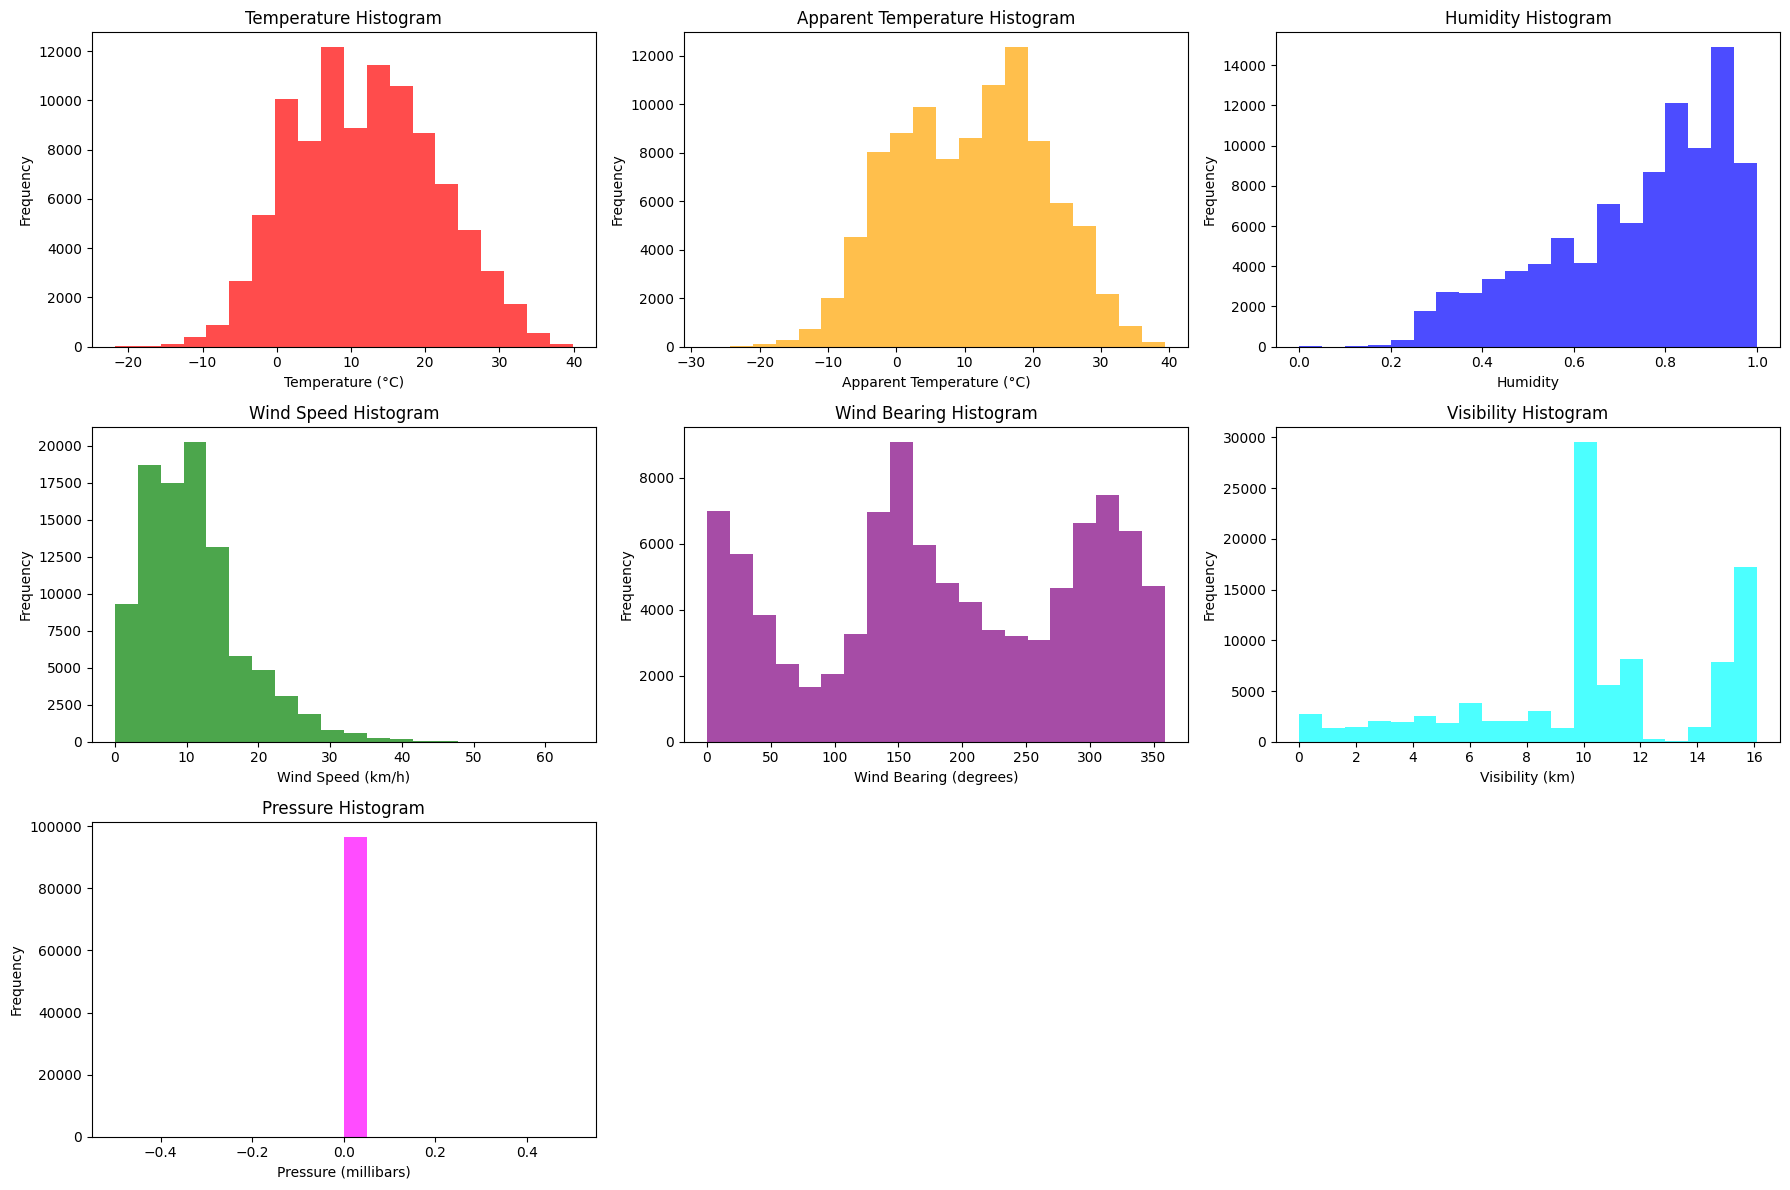

In [2]:
# Preprocess Data

# Exclude daily summary since it is not independent of the row
# Exclude the "Loud Cover" column: Loud cover is always 0, so it can't be learned from
weatherHistory_processed = np.delete(weatherHistory, [9, 11], axis=1)

# Exclude rows where pressure is equal to 0
valid_indices = np.where(weatherHistory_processed[1:, 9] != '0')[0]

# Remove rows where pressure is equal to 0 from weatherHistory
weatherHistory_processed = weatherHistory_processed[np.hstack(([True], valid_indices + 1))]

# Define the column indices containing numerical data
numeric_columns = [3, 4, 5, 6, 7, 8, 9]

# Convert only the numerical columns to float for visualization
weather_data_numeric = weatherHistory[1:, numeric_columns].astype(float)

# Plot histograms for various features
plt.figure(figsize=(18, 12))

# Temperature histogram
plt.subplot(3, 3, 1)
plt.hist(weather_data_numeric[:, 0], bins=20, color='red', alpha=0.7)
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Temperature Histogram')

# Apparent Temperature histogram
plt.subplot(3, 3, 2)
plt.hist(weather_data_numeric[:, 1], bins=20, color='orange', alpha=0.7)
plt.xlabel('Apparent Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Apparent Temperature Histogram')

# Humidity histogram
plt.subplot(3, 3, 3)
plt.hist(weather_data_numeric[:, 2], bins=20, color='blue', alpha=0.7)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Humidity Histogram')

# Wind Speed histogram
plt.subplot(3, 3, 4)
plt.hist(weather_data_numeric[:, 3], bins=20, color='green', alpha=0.7)
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.title('Wind Speed Histogram')

# Wind Bearing histogram
plt.subplot(3, 3, 5)
plt.hist(weather_data_numeric[:, 4], bins=20, color='purple', alpha=0.7)
plt.xlabel('Wind Bearing (degrees)')
plt.ylabel('Frequency')
plt.title('Wind Bearing Histogram')

# Visibility histogram
plt.subplot(3, 3, 6)
plt.hist(weather_data_numeric[:, 5], bins=20, color='cyan', alpha=0.7)
plt.xlabel('Visibility (km)')
plt.ylabel('Frequency')
plt.title('Visibility Histogram')

# Pressure histogram
plt.subplot(3, 3, 7)
plt.hist(weather_data_numeric[:, 6], bins=20, color='magenta', alpha=0.7)
plt.xlabel('Pressure (millibars)')
plt.ylabel('Frequency')
plt.title('Pressure Histogram')

plt.tight_layout()
plt.show()

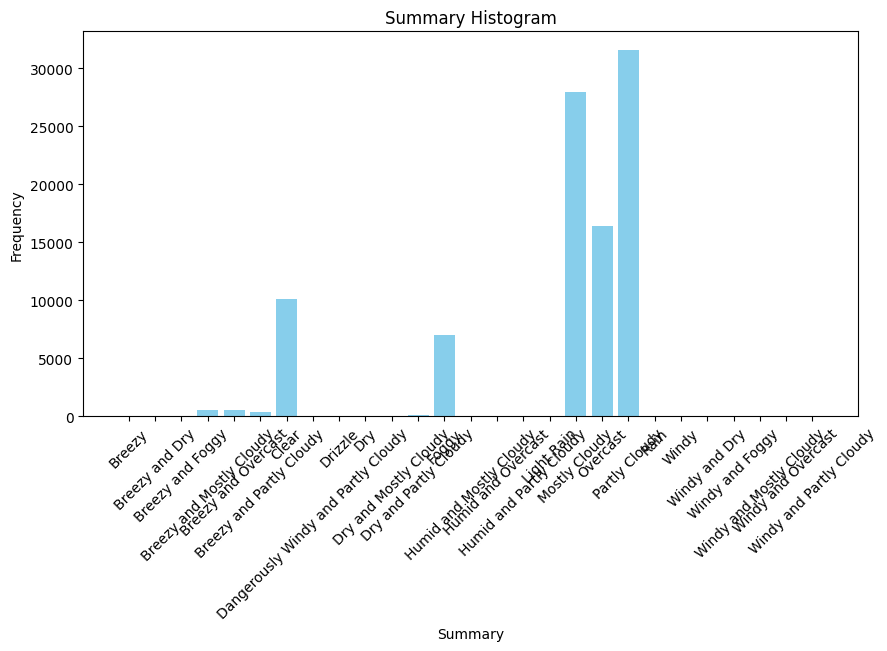

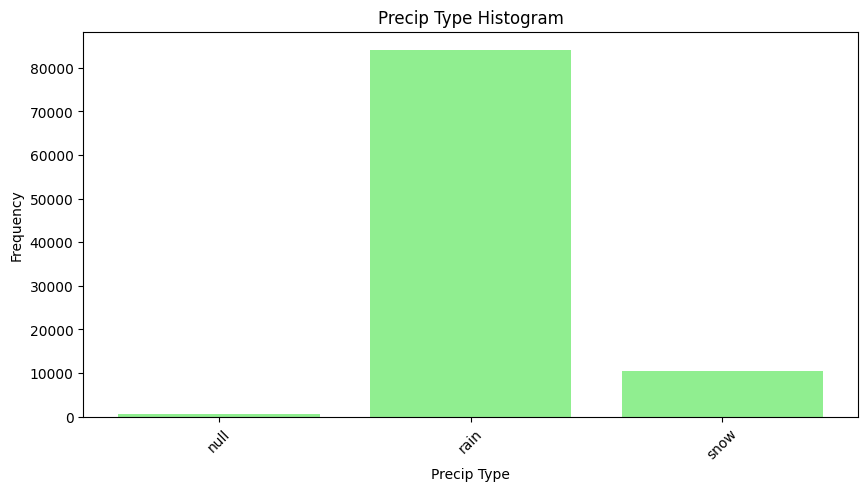

In [ ]:
# Extract features (X) and targets (y)
X = weatherHistory_processed[1:, 3:].astype(float)  # Features (excluding date and categorical columns)
summary_labels = weatherHistory_processed[1:, 1]  # Summary labels
precip_type_labels = weatherHistory_processed[1:, 2]  # Precip Type labels

# Get unique values and their counts for Summary and Precip Type
summary_values, summary_counts = np.unique(summary_labels, return_counts=True)
precip_type_values, precip_type_counts = np.unique(precip_type_labels, return_counts=True)

# Plot histograms for Summary
plt.figure(figsize=(10, 5))
plt.bar(summary_values, summary_counts, color='skyblue')
plt.xlabel('Summary')
plt.ylabel('Frequency')
plt.title('Summary Histogram')
plt.xticks(rotation=45)
plt.show()

# Plot histograms for Precip Type
plt.figure(figsize=(10, 5))
plt.bar(precip_type_values, precip_type_counts, color='lightgreen')
plt.xlabel('Precip Type')
plt.ylabel('Frequency')
plt.title('Precip Type Histogram')
plt.xticks(rotation=45)
plt.show()


In [ ]:
'''
The precip type shows that it is always raining or snowing. On the other hand, the summary has many forecasts that are dry. It is likely that the precip type is incorrect since
it is not possible for it to be raining or snowing every day from 2006-2016, so this label is disregarded.
'''

In [3]:
#Decision tree classifier predicting Summary

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Extract features (X) and targets (y)
X = weatherHistory_processed[1:, 3:].astype(float)  # Features (excluding date and categorical columns)
summary_labels = weatherHistory_processed[1:, 1]  # Summary labels

# Encode categorical variables
le_summary = LabelEncoder()
y_summary = le_summary.fit_transform(summary_labels)

# Train-test split
X_train, X_test, y_summary_train, y_summary_test = \
    train_test_split(X, y_summary, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
# For Summary
summary_classifier = DecisionTreeClassifier(random_state=42)
summary_classifier.fit(X_train, y_summary_train)

# Predictions for Summary
y_summary_pred = summary_classifier.predict(X_test)
summary_accuracy = accuracy_score(y_summary_test, y_summary_pred)
print("Accuracy for Summary:", summary_accuracy)

Accuracy for Summary: 0.4873640519098408


In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Extract features (X) and targets (y)
X = weatherHistory_processed[1:, 3:].astype(float)  # Features (excluding date and categorical columns)
summary_labels = weatherHistory_processed[1:, 1]  # Summary labels

# Encode categorical variables
le_summary = LabelEncoder()
y_summary = le_summary.fit_transform(summary_labels)

# Train-test split
X_train, X_test, y_summary_train, y_summary_test = \
    train_test_split(X, y_summary, test_size=0.2, random_state=42)

# Train Random Forest Classifier for Summary
rf_summary_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_summary_model.fit(X_train, y_summary_train)

# Train Gradient Boosting Classifier for Summary
gb_summary_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_summary_model.fit(X_train, y_summary_train)

# Train Support Vector Classifier for Summary
svm_summary_model = SVC(kernel='linear', random_state=42)
svm_summary_model.fit(X_train, y_summary_train)

# Evaluate models
rf_summary_acc = accuracy_score(y_summary_test, rf_summary_model.predict(X_test))
gb_summary_acc = accuracy_score(y_summary_test, gb_summary_model.predict(X_test))
svm_summary_acc = accuracy_score(y_summary_test, svm_summary_model.predict(X_test))


# Print results
print("Summary Prediction Models:")
print("Random Forest Accuracy:", rf_summary_acc)
print("Gradient Boosting Accuracy:", gb_summary_acc)
print("Support Vector Machine Accuracy:", svm_summary_acc)

Summary Prediction Models:
Random Forest Accuracy: 0.5826196605895024
Gradient Boosting Accuracy: 0.5356486103084117
Support Vector Machine Accuracy: 0.5020753428256186


In [9]:
# Try CNN
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Extract features (X) and targets (y)
X = weatherHistory_processed[1:, 3:].astype(float)  # Features (excluding date and categorical columns)
summary_labels = weatherHistory_processed[1:, 1]  # Summary labels

# Encode categorical variables
le_summary = LabelEncoder()
y_summary = le_summary.fit_transform(summary_labels)

# Train-test split
X_train, X_test, y_summary_train, y_summary_test = \
    train_test_split(X, y_summary, test_size=0.2, random_state=42)

# Reshape the input data for CNNs
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the CNN Model
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y_summary)), activation='softmax'),  # Output layer for Summary
])

# Compile the CNN Model
cnn_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Train the CNN Model
cnn_model.fit(X_train_cnn, y_summary_train, epochs=25, batch_size=32, validation_split=0.2)

# Evaluate the CNN Model
test_summary_loss, test_summary_accuracy = \
    cnn_model.evaluate(X_test_cnn, y_summary_test, verbose=0)
print("Test Summary Accuracy (CNN):", test_summary_accuracy)


Epoch 1/25
1904/1904 [==============================] - 6s 2ms/step - loss: 1.4853 - accuracy: 0.4088 - val_loss: 1.3851 - val_accuracy: 0.4352
Epoch 2/25
1904/1904 [==============================] - 6s 3ms/step - loss: 1.2790 - accuracy: 0.4464 - val_loss: 1.2094 - val_accuracy: 0.4742
Epoch 3/25
1904/1904 [==============================] - 5s 2ms/step - loss: 1.2158 - accuracy: 0.4615 - val_loss: 1.2115 - val_accuracy: 0.4707
Epoch 4/25
1904/1904 [==============================] - 4s 2ms/step - loss: 1.1847 - accuracy: 0.4746 - val_loss: 1.1760 - val_accuracy: 0.4740
Epoch 5/25
1904/1904 [==============================] - 6s 3ms/step - loss: 1.1688 - accuracy: 0.4781 - val_loss: 1.2272 - val_accuracy: 0.4740
Epoch 6/25
1904/1904 [==============================] - 4s 2ms/step - loss: 1.1554 - accuracy: 0.4842 - val_loss: 1.1422 - val_accuracy: 0.4963
Epoch 7/25
1904/1904 [==============================] - 5s 3ms/step - loss: 1.1440 - accuracy: 0.4872 - val_loss: 1.1510 - val_accuracy:

In [10]:
# Try RNN
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Extract features (X) and targets (y)
X = weatherHistory_processed[1:, 3:].astype(float)  # Features (excluding date and categorical columns)
summary_labels = weatherHistory_processed[1:, 1]  # Summary labels

# Encode categorical variables
le_summary = LabelEncoder()
y_summary = le_summary.fit_transform(summary_labels)

# Train-test split
X_train, X_test, y_summary_train, y_summary_test = \
    train_test_split(X, y_summary, test_size=0.2, random_state=42)

# Reshape the input data for RNNs
X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the RNN Model
rnn_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y_summary)), activation='softmax'),  # Output layer for Summary
])

# Compile the RNN Model
rnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train the RNN Model
rnn_model.fit(X_train_rnn, y_summary_train, epochs=25, batch_size=32, validation_split=0.2)

# Evaluate the RNN Model
test_summary_loss, test_summary_accuracy = \
    rnn_model.evaluate(X_test_rnn, y_summary_test, verbose=0)
print("Test Summary Accuracy (RNN):", test_summary_accuracy)

Epoch 1/25
1904/1904 [==============================] - 14s 5ms/step - loss: 3.1370 - accuracy: 0.3320 - val_loss: 1.6321 - val_accuracy: 0.2771
Epoch 2/25
1904/1904 [==============================] - 7s 4ms/step - loss: 1.7199 - accuracy: 0.3796 - val_loss: 2.1667 - val_accuracy: 0.1983
Epoch 3/25
1904/1904 [==============================] - 5s 3ms/step - loss: 1.5199 - accuracy: 0.4032 - val_loss: 1.2854 - val_accuracy: 0.4332
Epoch 4/25
1904/1904 [==============================] - 7s 4ms/step - loss: 1.4212 - accuracy: 0.4181 - val_loss: 1.3806 - val_accuracy: 0.3931
Epoch 5/25
1904/1904 [==============================] - 6s 3ms/step - loss: 1.3122 - accuracy: 0.4301 - val_loss: 1.2841 - val_accuracy: 0.4650
Epoch 6/25
1904/1904 [==============================] - 7s 4ms/step - loss: 1.2502 - accuracy: 0.4452 - val_loss: 1.2055 - val_accuracy: 0.4655
Epoch 7/25
1904/1904 [==============================] - 6s 3ms/step - loss: 1.2147 - accuracy: 0.4568 - val_loss: 1.2024 - val_accuracy

In [19]:
# Try LSTM
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Extract features (X) and targets (y)
X = weatherHistory_processed[1:, 3:].astype(float)  # Features (excluding date and categorical columns)
summary_labels = weatherHistory_processed[1:, 1]  # Summary labels

# Encode categorical variables
le_summary = LabelEncoder()
y_summary = le_summary.fit_transform(summary_labels)

# Train-test split
X_train, X_test, y_summary_train, y_summary_test = \
    train_test_split(X, y_summary, test_size=0.2, random_state=42)

# Reshape the input data for RNNs
X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Build the LSTM Model
lstm_model_original = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(np.unique(y_summary)), activation='softmax'),  # Output layer for Summary
])


# Learning Rate Scheduling
# Use learning rate scheduling with Adam optimizer
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Compile the LSTM Model
lstm_model_original.compile(optimizer=optimizer,
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])


# Train the LSTM Model
lstm_model_original.fit(X_train_rnn, y_summary_train, epochs=25, batch_size=32, validation_split=0.2)


# Evaluate the LSTM Model
test_summary_loss, test_summary_accuracy = \
    lstm_model_original.evaluate(X_test_rnn, y_summary_test, verbose=0)
print("Test Summary Accuracy (LSTM):", test_summary_accuracy)

Epoch 1/25
1904/1904 [==============================] - 14s 5ms/step - loss: 1.4642 - accuracy: 0.3942 - val_loss: 1.3129 - val_accuracy: 0.4469
Epoch 2/25
1904/1904 [==============================] - 10s 5ms/step - loss: 1.2885 - accuracy: 0.4538 - val_loss: 1.2915 - val_accuracy: 0.4474
Epoch 3/25
1904/1904 [==============================] - 11s 6ms/step - loss: 1.2687 - accuracy: 0.4598 - val_loss: 1.2754 - val_accuracy: 0.4704
Epoch 4/25
1904/1904 [==============================] - 10s 5ms/step - loss: 1.2614 - accuracy: 0.4631 - val_loss: 1.2619 - val_accuracy: 0.4614
Epoch 5/25
1904/1904 [==============================] - 9s 5ms/step - loss: 1.2512 - accuracy: 0.4663 - val_loss: 1.2381 - val_accuracy: 0.4651
Epoch 6/25
1904/1904 [==============================] - 10s 5ms/step - loss: 1.2275 - accuracy: 0.4678 - val_loss: 1.2196 - val_accuracy: 0.4691
Epoch 7/25
1904/1904 [==============================] - 11s 6ms/step - loss: 1.2069 - accuracy: 0.4662 - val_loss: 1.2058 - val_acc